**Project Name:**
Diwali Sales Analysis

**Project Summary:**


This project aims to analyze the sales data from Diwali to gain insights into sales performance, customer behavior, and to identify trends that can help in making informed business decisions for future campaigns.



**Problem Statements:**




1.   Which products have the highest sales during the Diwali season?
2.   What is the demographic profile of the highest spending customers?

1.   Are there any significant trends in sales across different regions?
2.   How can outliers be identified and what impact do they have on sales analysis?


1.   What patterns can be observed from data visualization to inform business strategies?








**Importing the Necessary Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset


In [29]:
# Load the dataset
data_path = '/content/Diwali Sales Data.csv'
diwali_data = pd.read_csv('/content/Diwali Sales Data.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 267: invalid start byte

In [5]:
import pandas as pd

# Attempt to read the CSV file with a different encoding
try:
    diwali_data = pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin-1')
    # Or try with 'ISO-8859-1' encoding if 'latin-1' doesn't work
    # diwali_data = pd.read_csv('/content/Diwali Sales Data.csv', encoding='ISO-8859-1')
    print(diwali_data.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [6]:
import chardet

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Example usage
file_path = '/content/Diwali Sales Data.csv'
detected_encoding = detect_encoding(file_path)
print(f"Detected encoding: {detected_encoding}")

Detected encoding: ISO-8859-1


In [10]:
# Load the dataset
data_path = '/content/Diwali Sales Data.csv'
diwali_data = pd.read_csv('/content/Diwali Sales Data.csv', encoding='ISO-8859-1')
diwali_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


**About the Dataset**


A brief description of the dataset, including the number of records and the types of variables involved.



**Understand the Given Variables**


We need to inspect the dataset to understand what variables are present and their respective data types.



In [11]:
diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
diwali_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


**Data Exploration and Data Cleaning**

Explore the data for missing values, duplicates, and inconsistent data types. Clean the data as needed.

In [13]:
diwali_data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [14]:
diwali_data.duplicated().sum()

8

In [15]:
diwali_data = diwali_data.drop_duplicates()

**Check Unique Value for Variables and Doing Some Experiments**


Cust_name: 1250 unique values
Product_ID: 2351 unique values
Gender: 2 unique values
Age Group: 7 unique values
State: 16 unique values
Zone: 5 unique values
Occupation: 15 unique values
Product_Category: 18 unique values


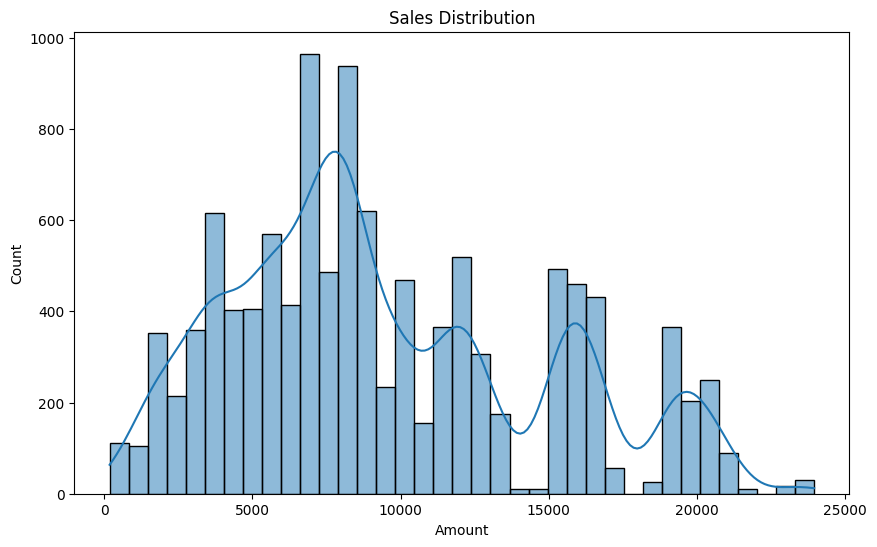

In [20]:
# Check unique values for categorical variables
for column in diwali_data.select_dtypes(include='object').columns:
    print(f"{column}: {diwali_data[column].nunique()} unique values")

# Some experiments (e.g., checking distribution of sales)
plt.figure(figsize=(10,6))
sns.histplot(diwali_data['Amount'], kde=True)
plt.title('Sales Distribution')
plt.show()


In [17]:
print(diwali_data.columns)

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')


**Describe the Dataset and Removing Outliers Using IQR Technique**


In [22]:
print(diwali_data.describe())

            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.124300e+04  11243.000000    11243.000000  11243.000000  11231.000000   
mean   1.003005e+06     35.422841        0.420261      2.488749   9454.084982   
std    1.716141e+03     12.756369        0.493623      1.114960   5221.728776   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001494e+06     27.000000        0.000000      1.000000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12677.500000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN  


In [25]:
numeric_cols = diwali_data.select_dtypes(include=[np.number]).columns
Q1 = diwali_data[numeric_cols].quantile(0.25)
Q3 = diwali_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
diwali_data_cleaned = diwali_data[~((diwali_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (diwali_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-26-eb96b34b8841>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product_Category', y='Amount', data=diwali_data_cleaned, ci=None)


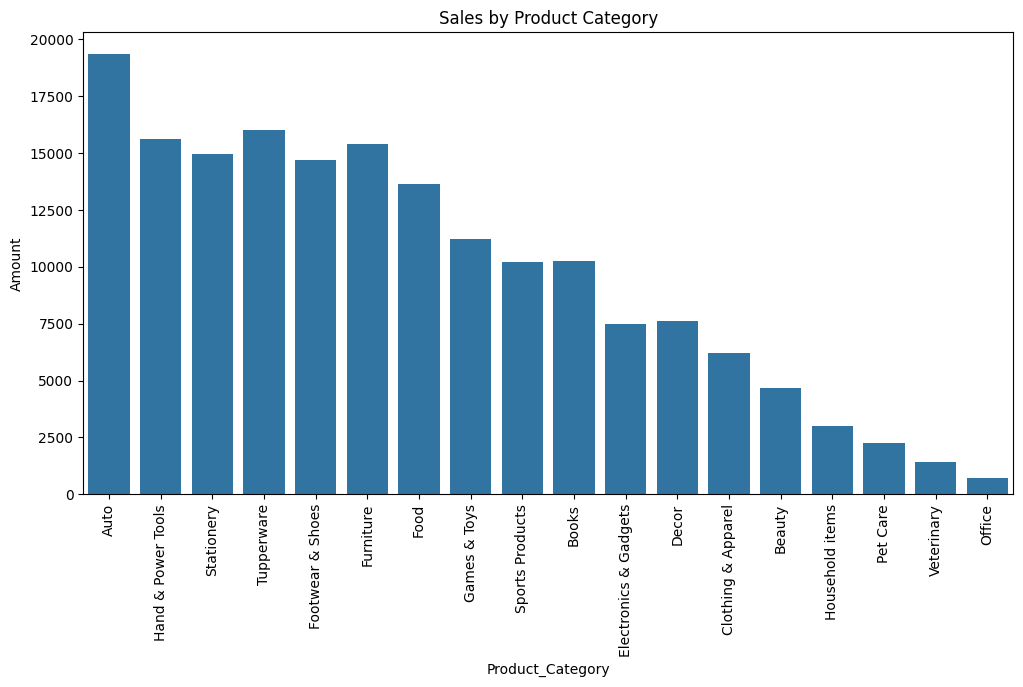

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category', y='Amount', data=diwali_data_cleaned, ci=None)
plt.title('Sales by Product Category')
plt.xticks(rotation=90)
plt.show()

<ipython-input-27-bf3a5c1cde62>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Zone', y='Amount', data=diwali_data_cleaned, ci=None)


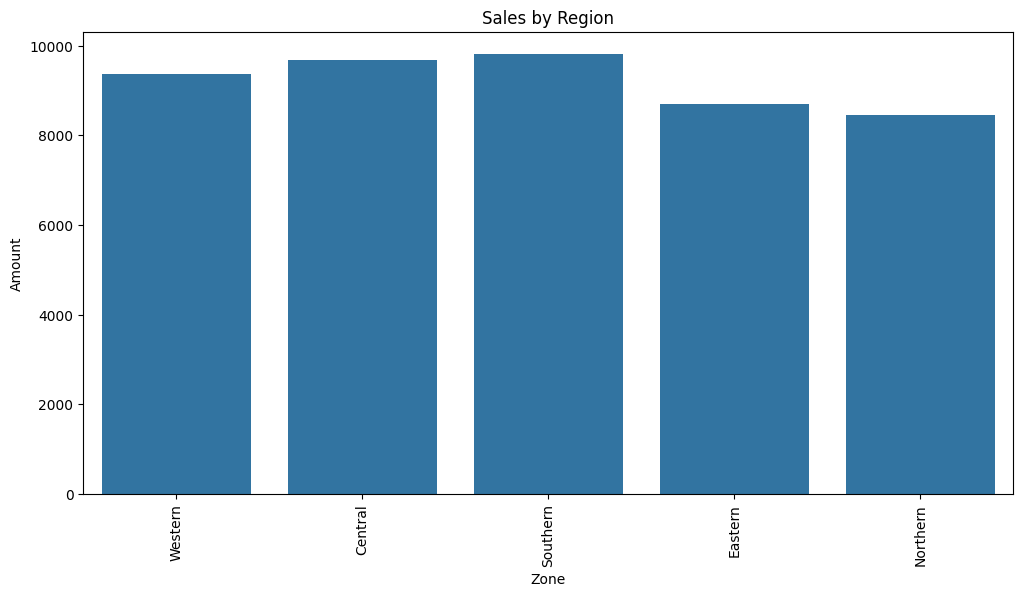

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Zone', y='Amount', data=diwali_data_cleaned, ci=None)
plt.title('Sales by Region')
plt.xticks(rotation=90)
plt.show()

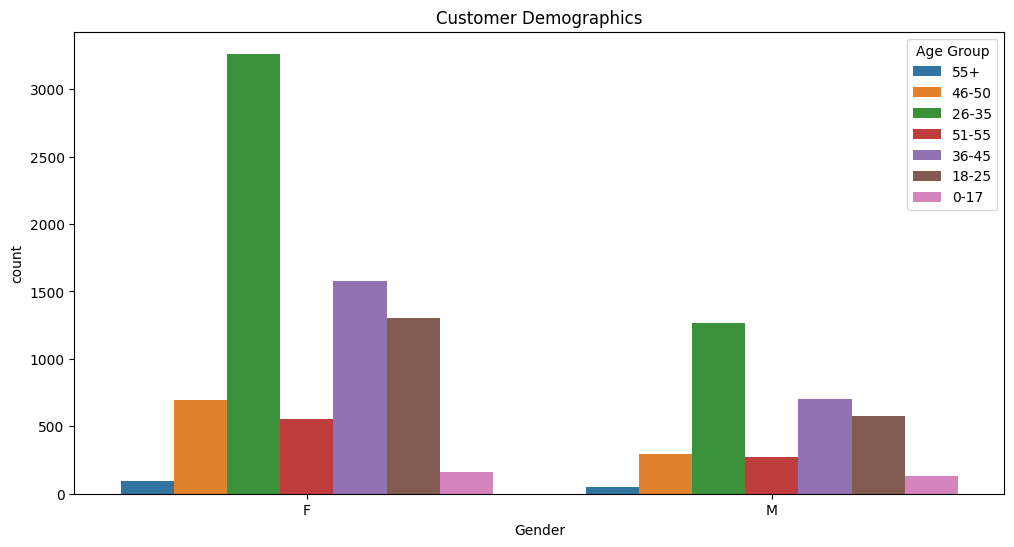

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='Age Group', data=diwali_data_cleaned)
plt.title('Customer Demographics')
plt.show()

**Conclusion**



1.  ** Product Performance:** Identify top-selling products and ensure they are well-stocked for future Diwali seasons.

2.   **Customer Demographics:** Target marketing
campaigns towards the demographic groups that have the highest spending.

1.   **Regional Insights:** Allocate more resources and marketing efforts to regions with higher sales.

2.   **Data-driven Decisions:** Use visual and statistical insights to inform strategic decisions for inventory management, marketing, and customer engagement.







**Thank You**
